In [11]:
import pandas as pd
import numpy as np
import os
from glob import glob
from matplotlib import pyplot as plt

In [12]:
calibrated_fnames = sorted(glob(os.path.join("..", "..", "outputs", "numpy_arrays", "calib_analysis_calibrated", "*.npy")))
uncalibrated_fnames = sorted(glob(os.path.join("..", "..", "outputs", "numpy_arrays", "calib_analysis_uncalibrated", "*.npy")))

In [13]:
def get_smoking_rates(fnames):
    rates = []
    for fname in fnames:
        arr = np.load(fname)
        # print(arr.shape) # 51,2,2,2,6
        arr = arr[:6]
        arr = np.sum(arr, axis=(1,2,3))
        totals = np.sum(arr, axis=1)
        arr /= totals[:,np.newaxis]
        arr = arr[:,2] + arr[:,3]
        rates.append(arr)
    rates = np.array(rates)
    return rates

calibrated_rates = get_smoking_rates(calibrated_fnames) * 100
uncalibrated_rates = get_smoking_rates(uncalibrated_fnames) * 100

In [14]:
"""
100 runs, 5 years
"""
print(calibrated_rates.shape)

(10, 6)


In [15]:
calibrated_mean = np.mean(calibrated_rates, axis=0)
calibrated_upper = np.percentile(calibrated_rates, 97.5, axis=0)
calibrated_lower = np.percentile(calibrated_rates, 2.5, axis=0)

uncalibrated_mean = np.mean(uncalibrated_rates, axis=0)
uncalibrated_upper = np.percentile(uncalibrated_rates, 97.5, axis=0)
uncalibrated_lower = np.percentile(uncalibrated_rates, 2.5, axis=0)

In [16]:
print(calibrated_mean)
print(uncalibrated_mean)

[15.02593946 14.37140428 13.4511825  12.6933484  11.97607353 11.42081893]
[15.02039185 15.24014581 14.77816726 14.5079866  14.16979178 13.86027942]


In [17]:
nhis_arr = pd.read_excel("/Users/nick/Documents/Gillings_work/nhis_data/NHIS_state_age_Sep2022.xlsx").to_numpy()
nhis_arr = list(nhis_arr[2::5,3])
nhis_arr += [10.4438]
print(nhis_arr)

[15.13160774813408, 13.729302965096327, 13.439976239784048, 13.36313651838806, 12.339752606221008, 10.4438]


[2016 2017 2018 2019 2020 2021]


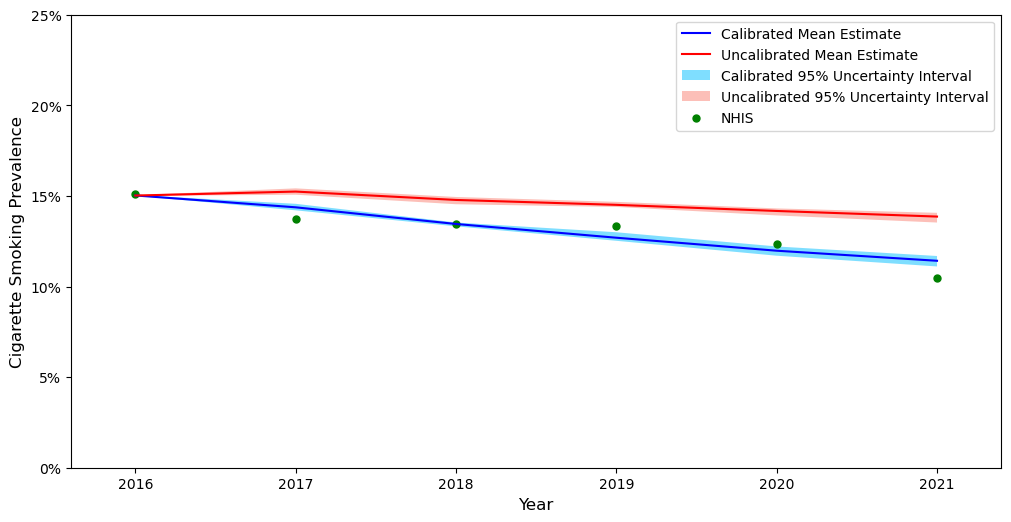

In [21]:
fig, ax = plt.subplots(1,1,figsize=(12,6), dpi=100)

x = np.arange(2016,2022)
print(x)

""" 
When summing to get population totals, make sure that the menthol+nonmenthol group
is not summed, because then we will be double counting those smoker groups
"""

ax.plot(x, calibrated_mean, "blue")
ax.fill_between(x, calibrated_lower, calibrated_upper, facecolor='deepskyblue', alpha=0.5)

ax.plot(x, uncalibrated_mean, "red")
ax.fill_between(x, uncalibrated_lower, uncalibrated_upper, facecolor='salmon', alpha=0.5)

ax.scatter(x, nhis_arr, s=25, c="green")

plt.xlim(x[0]-0.4, x[-1]+0.4)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cigarette Smoking Prevalence", fontsize=12)
plt.xticks(x, fontsize=10, horizontalalignment='center')
y_tick_nums = np.arange(0,25 + 1,5) # plus one because arange doesn't include the "stop" param
y_tick_labels = [str(x) + "%" for x in y_tick_nums]
plt.yticks(y_tick_nums, y_tick_labels)
plt.legend([ 
    f"Calibrated Mean Estimate",
    f"Uncalibrated Mean Estimate",
    f"Calibrated 95% Uncertainty Interval"image.png,
    f"Uncalibrated 95% Uncertainty Interval",
    f"NHIS"
])

plt.show()